In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/raw/all_games.csv')
df_2 = pd.read_csv('../data/raw/video_games_sales.csv')

In [3]:
# drop columns

def drop_columns_in_table_1(df):
    df = df.drop(columns=['summary'])
    return df

def drop_columns_in_table_2(df_2):
    df = df_2.drop(columns=['rank'])
    return df

In [4]:
updated_df = drop_columns_in_table_1(df)
updated_df_2 = drop_columns_in_table_2(df_2)

display(updated_df, updated_df_2)

,name,platform,release_date,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9
...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012",20,1.7


,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
display(updated_df['platform'].unique())
display(updated_df_2['platform'].unique())

array([' Nintendo 64', ' PlayStation', ' PlayStation 3', ' Dreamcast',
       ' Xbox 360', ' Wii', ' Xbox One', ' PC', ' Switch',
       ' PlayStation 2', ' PlayStation 4', ' GameCube', ' Xbox', ' Wii U',
       ' Game Boy Advance', ' 3DS', ' Xbox Series X', ' DS',
       ' PlayStation Vita', ' PlayStation 5', ' PSP', ' Stadia'],
      dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
def new_platform_column(updated_df):
    platform_mapping = {'Nintendo 64':'Nintendo 64', 'PlayStation':'PlayStation', 'PlayStation 3':'PlayStation 3', 'Dreamcast':'Dreamcast', 'Xbox 360':'Xbox 360',
                          'Wii':'Wii', 'Xbox One':'Xbox One', 'PC':'PC', 'Switch':'Nintendo Switch', 'PlayStation 2':'PlayStation 2',
                               'PlayStation 4':'PlayStation 4', 'GameCube':'GameCube', 'Xbox':'Xbox', 'Wii U':'Wii U', 'Game Boy Advance':'Game Boy Advance', '3DS':'Nintendo 3DS', 'Xbox Series X':'Xbox Series X', 'DS':'Nintendo DS', 
                                   'PlayStation Vita':'PlayStation Vita', 'PlayStation 5':'PlayStation 5', 'PSP':'PlayStation Portable', 'Stadia':'Google Stadia'}
    updated_df['platform'] = updated_df['platform'].replace(platform_mapping)
    return updated_df

def new_platform_column(updated_df_2):
    platform_mapping = {'Wii':'Wii', 'NES':'Nintendo NES', 'GB':'Gameboy', 'DS':'Nintendo DS', 'X360':'Xbox 360',
                          'PS3':'PlayStation 3', 'PS2':'PlayStation 2', 'GBA':'Gameboy Advance', 'SNES':'Nintendo Super NES', '3DS':'Nintendo 3DS',
                               'PS4':'PlayStation 4', 'N64':'Nintendo 64', 'PS':'PlayStation', 'XB':'Xbox', 'PC':'PC', '2600':'2600', 'PSP':'PlayStation Portable', 'XOne':'Xbox One', 'GC':'Game Cube', 'WiiU':'Wii U', 'GEN':'GEN',
                                   'DC':'Dreamcast', 'PSV':'PlayStation Vita', 'SAT':'Saturn', 'SCD':'SEGA CD', 'WS':'WonderSwan', 'NG':'Neo Geo', 'TG16':'TurboGrafx-16', '3DO':'3DO Interactive Multiplayer', 'GG':'SEGA Game Gear', 'PCFX':'PC-FX'}
    updated_df_2['platform'] = updated_df_2['platform'].replace(platform_mapping)
    return updated_df_2

In [7]:
display(new_platform_column(updated_df))

,name,platform,release_date,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9
...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012",20,1.7


In [8]:
display(new_platform_column(updated_df_2))

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,Nintendo NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,Gameboy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Gameboy Advance,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,Game Cube,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PlayStation 2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,Nintendo DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
# to check for NaN
updated_df_2.isna().sum()

name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [10]:
updated_df.isna().sum()

name            0
platform        0
release_date    0
meta_score      0
user_review     0
dtype: int64

In [11]:
# Replace non-numeric values with NaN, then convert to numeric
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')

# Handle missing values (optional, depending on your data)
df['user_review'].fillna(0, inplace=True)  # Or use another value or method for filling NaNs

# Convert the user_review column to float
df['user_review'] = df['user_review'].astype(float)

# Display the first few rows to confirm the change
print(df.head())
print(df['user_review'].dtype)  # Should print 'float64'

                                   name        platform        release_date  \
0  The Legend of Zelda: Ocarina of Time     Nintendo 64   November 23, 1998   
1              Tony Hawk's Pro Skater 2     PlayStation  September 20, 2000   
2                   Grand Theft Auto IV   PlayStation 3      April 29, 2008   
3                           SoulCalibur       Dreamcast   September 8, 1999   
4                   Grand Theft Auto IV        Xbox 360      April 29, 2008   

                                             summary  meta_score  user_review  
0  As a young boy, Link is tricked by Ganondorf, ...          99          9.1  
1  As most major publishers' development efforts ...          98          7.4  
2  [Metacritic's 2008 PS3 Game of the Year; Also ...          98          7.7  
3  This is a tale of souls and swords, transcendi...          98          8.4  
4  [Metacritic's 2008 Xbox 360 Game of the Year; ...          98          7.9  
float64


/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/2700334080.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_review'].fillna(0, inplace=True)  # Or use another value or method for filling NaNs


In [12]:
dropped_na_tb_2_df = updated_df_2.dropna(subset=['year', 'jp_sales', 'eu_sales', 'other_sales', 'global_sales'])
display(dropped_na_tb_2_df)
# TO CHECK THIS AND WHY 0.0 STILL APPEAR

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,Nintendo NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,Gameboy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Gameboy Advance,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,Game Cube,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PlayStation 2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,Nintendo DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [13]:
dropped_na_tb_2_df['year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

In [14]:
dropped_na_tb_2_df['year'] = dropped_na_tb_2_df['year'].astype(int)

/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/773501899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_na_tb_2_df['year'] = dropped_na_tb_2_df['year'].astype(int)


In [15]:
display(dropped_na_tb_2_df)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,Nintendo NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,Gameboy,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Gameboy Advance,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,Game Cube,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PlayStation 2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,Nintendo DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [16]:
# Perform the merge
#common_columns = ['name', 'platform']
#merged_df = pd.merge(updated_df, dropped_na_tb_2_df, on=common_columns, how='right')

# Display the merged dataframe
#display(merged_df)

In [17]:
merged_df = pd.merge(updated_df, dropped_na_tb_2_df, on=['name'], how='inner')
display(merged_df.head(20))

,name,platform_x,release_date,meta_score,user_review,platform_y,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1,Nintendo 64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1,Nintendo 3DS,2011,Action,Nintendo,2.03,1.27,0.62,0.30,4.21
2,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,PlayStation,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
3,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,Gameboy Advance,2001,Sports,Activision,0.85,0.31,0.00,0.02,1.18
4,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,Nintendo 64,2001,Sports,Activision,0.59,0.16,0.00,0.01,0.76
5,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7,Xbox 360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
6,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7,PlayStation 3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
7,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7,PC,2008,Action,Take-Two Interactive,0.01,0.79,0.00,0.08,0.88
8,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4,Dreamcast,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34
9,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9,Xbox 360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02


In [18]:
# Check for any missing values in the merged DataFrame
print(merged_df.isnull().sum())

name            0
platform_x      0
release_date    0
meta_score      0
user_review     0
platform_y      0
year            0
genre           0
publisher       1
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64


In [19]:
# Check for any duplicate entries
duplicates = merged_df[merged_df.duplicated(subset=['name'], keep=False)]
display(duplicates)

,name,platform_x,release_date,meta_score,user_review,platform_y,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1,Nintendo 64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1,Nintendo 3DS,2011,Action,Nintendo,2.03,1.27,0.62,0.30,4.21
2,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,PlayStation,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
3,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,Gameboy Advance,2001,Sports,Activision,0.85,0.31,0.00,0.02,1.18
4,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,Nintendo 64,2001,Sports,Activision,0.59,0.16,0.00,0.01,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,Legends of Wrestling II,Game Boy Advance,"November 25, 2002",24,3.6,Gameboy Advance,2002,Fighting,Acclaim Entertainment,0.05,0.02,0.00,0.00,0.07
18192,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",22,1.3,Xbox 360,2013,Action,Activision,0.00,0.04,0.00,0.00,0.05
18193,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",22,1.3,PlayStation 3,2013,Action,Activision,0.00,0.03,0.00,0.00,0.03
18194,Leisure Suit Larry: Box Office Bust,PC,"March 31, 2009",20,2.0,Xbox 360,2009,Adventure,Codemasters,0.14,0.01,0.00,0.01,0.16


In [20]:
# Filter the DataFrame to keep only rows where platform_x is equal to platform_y
# Remove leading and trailing spaces
merged_df['platform_x'] = merged_df['platform_x'].str.strip()
merged_df['platform_y'] = merged_df['platform_y'].str.strip()
# Convert both columns to lowercase
merged_df['platform_x'] = merged_df['platform_x'].str.lower()
merged_df['platform_y'] = merged_df['platform_y'].str.lower()
# Display unique values in each platform column
print(merged_df['platform_x'].unique())
print(merged_df['platform_y'].unique())
filtered_df = merged_df[merged_df['platform_x'] == merged_df['platform_y']]

# Display the filtered DataFrame
display(filtered_df)

['nintendo 64' 'playstation' 'playstation 3' 'dreamcast' 'xbox 360' 'wii'
 'xbox one' 'playstation 2' 'playstation 4' 'gamecube' 'xbox' 'pc'
 'game boy advance' 'ds' 'wii u' 'playstation 5' '3ds' 'switch' 'psp'
 'xbox series x' 'playstation vita']
['nintendo 64' 'nintendo 3ds' 'playstation' 'gameboy advance' 'xbox 360'
 'playstation 3' 'pc' 'dreamcast' 'wii' 'playstation 4' 'xbox one'
 'playstation 2' 'game cube' 'xbox' 'wii u' 'playstation portable'
 'nintendo super nes' 'nintendo ds' 'gameboy' 'playstation vita' 'saturn'
 '2600' 'gen' 'nintendo nes' 'sega cd' 'neo geo' 'wonderswan']


,name,platform_x,release_date,meta_score,user_review,platform_y,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,The Legend of Zelda: Ocarina of Time,nintendo 64,"November 23, 1998",99,9.1,nintendo 64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
2,Tony Hawk's Pro Skater 2,playstation,"September 20, 2000",98,7.4,playstation,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
6,Grand Theft Auto IV,playstation 3,"April 29, 2008",98,7.7,playstation 3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
8,SoulCalibur,dreamcast,"September 8, 1999",98,8.4,dreamcast,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34
9,Grand Theft Auto IV,xbox 360,"April 29, 2008",98,7.9,xbox 360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18182,Cruis'n,wii,"November 27, 2007",25,4.0,wii,2007,Racing,Midway Games,0.10,0.01,0.00,0.01,0.12
18183,Gravity Games Bike: Street Vert Dirt,playstation 2,"June 27, 2002",24,3.4,playstation 2,2002,Sports,Midway Games,0.05,0.04,0.00,0.01,0.10
18188,Pulse Racer,xbox,"January 2, 2003",24,2.2,xbox,2003,Racing,Jaleco,0.01,0.00,0.00,0.00,0.02
18189,Fighter Within,xbox one,"November 19, 2013",23,2.8,xbox one,2013,Fighting,Ubisoft,0.11,0.07,0.00,0.02,0.19


In [21]:
#pd.set_option('display.max_rows', None)  # Show all rows

In [22]:
#pd.reset_option('display.max_rows')

In [23]:
merged_df

,name,platform_x,release_date,meta_score,user_review,platform_y,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,The Legend of Zelda: Ocarina of Time,nintendo 64,"November 23, 1998",99,9.1,nintendo 64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,The Legend of Zelda: Ocarina of Time,nintendo 64,"November 23, 1998",99,9.1,nintendo 3ds,2011,Action,Nintendo,2.03,1.27,0.62,0.30,4.21
2,Tony Hawk's Pro Skater 2,playstation,"September 20, 2000",98,7.4,playstation,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
3,Tony Hawk's Pro Skater 2,playstation,"September 20, 2000",98,7.4,gameboy advance,2001,Sports,Activision,0.85,0.31,0.00,0.02,1.18
4,Tony Hawk's Pro Skater 2,playstation,"September 20, 2000",98,7.4,nintendo 64,2001,Sports,Activision,0.59,0.16,0.00,0.01,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,Charlie's Angels,gamecube,"July 9, 2003",23,4.3,game cube,2003,Action,Ubisoft,0.01,0.00,0.00,0.00,0.02
18192,Fast & Furious: Showdown,xbox 360,"May 21, 2013",22,1.3,xbox 360,2013,Action,Activision,0.00,0.04,0.00,0.00,0.05
18193,Fast & Furious: Showdown,xbox 360,"May 21, 2013",22,1.3,playstation 3,2013,Action,Activision,0.00,0.03,0.00,0.00,0.03
18194,Leisure Suit Larry: Box Office Bust,pc,"March 31, 2009",20,2.0,xbox 360,2009,Adventure,Codemasters,0.14,0.01,0.00,0.01,0.16


In [24]:
merged_df['name'] = merged_df['name'].str.replace('.', '', regex=False)

In [25]:
merged_df['name'] = merged_df['name'].str.replace(':', ' ', regex=False)

In [26]:
merged_df['name'] = merged_df['name'].str.replace('/', ' ', regex=False)

In [27]:
# Replace non-numeric values with NaN, then convert to numeric
merged_df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')

# Handle missing values (optional, depending on your data)
merged_df['user_review'].fillna(0, inplace=True)  # Or use another value or method for filling NaNs

# Convert the user_review column to float
merged_df['user_review'] = merged_df['user_review'].astype(float)

# Display the first few rows to confirm the change
print(merged_df.head())
print(merged_df['user_review'].dtype)  # Should print 'float64'

                                   name   platform_x        release_date  \
0  The Legend of Zelda  Ocarina of Time  nintendo 64   November 23, 1998   
1  The Legend of Zelda  Ocarina of Time  nintendo 64   November 23, 1998   
2              Tony Hawk's Pro Skater 2  playstation  September 20, 2000   
3              Tony Hawk's Pro Skater 2  playstation  September 20, 2000   
4              Tony Hawk's Pro Skater 2  playstation  September 20, 2000   

   meta_score  user_review       platform_y  year   genre   publisher  \
0          99          9.1      nintendo 64  1998  Action    Nintendo   
1          99          7.4     nintendo 3ds  2011  Action    Nintendo   
2          98          7.7      playstation  2000  Sports  Activision   
3          98          8.4  gameboy advance  2001  Sports  Activision   
4          98          7.9      nintendo 64  2001  Sports  Activision   

   na_sales  eu_sales  jp_sales  other_sales  global_sales  
0      4.10      1.89      1.45         0.1

/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/3366493983.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['user_review'].fillna(0, inplace=True)  # Or use another value or method for filling NaNs


In [28]:
merged_df

,name,platform_x,release_date,meta_score,user_review,platform_y,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,The Legend of Zelda Ocarina of Time,nintendo 64,"November 23, 1998",99,9.1,nintendo 64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,The Legend of Zelda Ocarina of Time,nintendo 64,"November 23, 1998",99,7.4,nintendo 3ds,2011,Action,Nintendo,2.03,1.27,0.62,0.30,4.21
2,Tony Hawk's Pro Skater 2,playstation,"September 20, 2000",98,7.7,playstation,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
3,Tony Hawk's Pro Skater 2,playstation,"September 20, 2000",98,8.4,gameboy advance,2001,Sports,Activision,0.85,0.31,0.00,0.02,1.18
4,Tony Hawk's Pro Skater 2,playstation,"September 20, 2000",98,7.9,nintendo 64,2001,Sports,Activision,0.59,0.16,0.00,0.01,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,Charlie's Angels,gamecube,"July 9, 2003",23,1.9,game cube,2003,Action,Ubisoft,0.01,0.00,0.00,0.00,0.02
18192,Fast & Furious Showdown,xbox 360,"May 21, 2013",22,2.7,xbox 360,2013,Action,Activision,0.00,0.04,0.00,0.00,0.05
18193,Fast & Furious Showdown,xbox 360,"May 21, 2013",22,6.3,playstation 3,2013,Action,Activision,0.00,0.03,0.00,0.00,0.03
18194,Leisure Suit Larry Box Office Bust,pc,"March 31, 2009",20,2.0,xbox 360,2009,Adventure,Codemasters,0.14,0.01,0.00,0.01,0.16


In [29]:
merged_df['name'].isna().sum()

np.int64(0)

In [30]:
merged_df['name'] = merged_df['name'].str.lower()

In [31]:
merged_df

,name,platform_x,release_date,meta_score,user_review,platform_y,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,the legend of zelda ocarina of time,nintendo 64,"November 23, 1998",99,9.1,nintendo 64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,the legend of zelda ocarina of time,nintendo 64,"November 23, 1998",99,7.4,nintendo 3ds,2011,Action,Nintendo,2.03,1.27,0.62,0.30,4.21
2,tony hawk's pro skater 2,playstation,"September 20, 2000",98,7.7,playstation,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
3,tony hawk's pro skater 2,playstation,"September 20, 2000",98,8.4,gameboy advance,2001,Sports,Activision,0.85,0.31,0.00,0.02,1.18
4,tony hawk's pro skater 2,playstation,"September 20, 2000",98,7.9,nintendo 64,2001,Sports,Activision,0.59,0.16,0.00,0.01,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,charlie's angels,gamecube,"July 9, 2003",23,1.9,game cube,2003,Action,Ubisoft,0.01,0.00,0.00,0.00,0.02
18192,fast & furious showdown,xbox 360,"May 21, 2013",22,2.7,xbox 360,2013,Action,Activision,0.00,0.04,0.00,0.00,0.05
18193,fast & furious showdown,xbox 360,"May 21, 2013",22,6.3,playstation 3,2013,Action,Activision,0.00,0.03,0.00,0.00,0.03
18194,leisure suit larry box office bust,pc,"March 31, 2009",20,2.0,xbox 360,2009,Adventure,Codemasters,0.14,0.01,0.00,0.01,0.16


In [32]:
sorted_merged_df = merged_df.sort_values(by='global_sales', ascending=False)
sorted_merged_df

,name,platform_x,release_date,meta_score,user_review,platform_y,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
7482,wii sports,wii,"November 19, 2006",76,7.3,wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3873,mario kart wii,wii,"April 27, 2008",82,4.0,wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4836,wii sports resort,wii,"July 26, 2009",80,7.9,wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2438,tetris,psp,"October 1, 2009",85,8.4,gameboy,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
4872,tetris,playstation 3,"January 4, 2011",80,8.4,gameboy,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,surf's up,wii,"May 30, 2007",64,6.7,game cube,2007,Sports,Ubisoft,0.01,0.00,0.00,0.00,0.01
3706,marvel ultimate alliance,xbox 360,"October 24, 2006",82,8.1,pc,2006,Role-Playing,Activision,0.01,0.00,0.00,0.00,0.01
3716,guitar hero iii legends of rock,playstation 2,"October 28, 2007",82,6.7,pc,2007,Misc,Aspyr,0.01,0.00,0.00,0.00,0.01
16372,hyperdimension neptunia mk2,pc,"February 28, 2012",53,8.3,playstation 3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01


In [33]:
#DROPPED COLUMN PLATFORM X !!!!!!!!!!
sorted_merged_df2 = sorted_merged_df.drop(columns=['platform_x'])
sorted_merged_df2

,name,release_date,meta_score,user_review,platform_y,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
7482,wii sports,"November 19, 2006",76,7.3,wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3873,mario kart wii,"April 27, 2008",82,4.0,wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4836,wii sports resort,"July 26, 2009",80,7.9,wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2438,tetris,"October 1, 2009",85,8.4,gameboy,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
4872,tetris,"January 4, 2011",80,8.4,gameboy,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,surf's up,"May 30, 2007",64,6.7,game cube,2007,Sports,Ubisoft,0.01,0.00,0.00,0.00,0.01
3706,marvel ultimate alliance,"October 24, 2006",82,8.1,pc,2006,Role-Playing,Activision,0.01,0.00,0.00,0.00,0.01
3716,guitar hero iii legends of rock,"October 28, 2007",82,6.7,pc,2007,Misc,Aspyr,0.01,0.00,0.00,0.00,0.01
16372,hyperdimension neptunia mk2,"February 28, 2012",53,8.3,playstation 3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01


In [34]:
#TO VAN ANALYSIS START

In [35]:
merged_df = merged_df.dropna(subset=['global_sales'])

# Group by name and sum the global sales to identify the top 10 games
sum_merged_df = merged_df.groupby('name')['global_sales'].sum()

# Sort the DataFrame by global sales in descending order
sorted_sum_merged_df = sum_merged_df.sort_values(ascending=False)

# Select the top 10 games
top_10_world = sorted_sum_merged_df.head(10)

# Print the top 10 games by global sales
top_10_world

name
grand theft auto v                  279.60
call of duty  black ops             147.00
call of duty  ghosts                136.90
call of duty  modern warfare 3      123.32
call of duty  black ops ii          118.88
madden nfl 07                        82.80
wii sports                           82.74
guitar hero iii  legends of rock     82.00
fifa soccer 13                       80.80
call of duty  world at war           79.35
Name: global_sales, dtype: float64

In [36]:
sum_merged_df = merged_df.groupby('name')['global_sales'].sum()
sum_merged_df

name
007  quantum of solace          19.60
007  the world is not enough     2.47
007 racing                       0.53
100 classic books                0.67
101-in-1 explosive megamix       0.20
                                ...  
zoo tycoon 2 ds                  0.30
zoo tycoon ds                    1.00
zoocube                          0.14
zubo                             0.12
zumba fitness rush               0.19
Name: global_sales, Length: 4575, dtype: float64

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure there are no missing sales columns
merged_df = merged_df.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'])

# Step 1: Group by name and sum global sales to get total sales per game
sum_merged_df = merged_df.groupby('name')['global_sales'].sum()
sum_merged_df

# Sort the summed sales in descending order and get the top 10 games
top_10_world = sum_merged_df.sort_values(ascending=False).head(10)
top_10_world

# Step 2: Filter the original DataFrame to include only the top 10 games
top_10_df = merged_df[merged_df['name'].isin(top_10_world.index)]
top_10_df

,name,platform_x,release_date,meta_score,user_review,platform_y,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
14,grand theft auto v,xbox one,"November 18, 2014",97,7.5,playstation 3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
15,grand theft auto v,xbox one,"November 18, 2014",97,8.8,xbox 360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
16,grand theft auto v,xbox one,"November 18, 2014",97,8.5,playstation 4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
17,grand theft auto v,xbox one,"November 18, 2014",97,8.4,xbox one,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
18,grand theft auto v,xbox one,"November 18, 2014",97,8.6,pc,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15656,fifa soccer 13,playstation vita,"September 25, 2012",57,6.4,wii u,2012,Action,Electronic Arts,0.18,0.26,0.00,0.04,0.48
15657,fifa soccer 13,playstation vita,"September 25, 2012",57,0.0,playstation vita,2012,Action,Electronic Arts,0.00,0.30,0.05,0.12,0.47
15658,fifa soccer 13,playstation vita,"September 25, 2012",57,6.2,pc,2012,Action,Electronic Arts,0.02,0.31,0.00,0.07,0.41
15659,fifa soccer 13,playstation vita,"September 25, 2012",57,8.1,playstation portable,2012,Action,Electronic Arts,0.05,0.19,0.02,0.10,0.37


In [38]:
melted_df = pd.melt(top_10_df, id_vars=['name'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                    var_name='region', value_name='sales')
melted_df

,name,region,sales
0,grand theft auto v,na_sales,7.01
1,grand theft auto v,na_sales,9.63
2,grand theft auto v,na_sales,3.80
3,grand theft auto v,na_sales,2.66
4,grand theft auto v,na_sales,0.36
...,...,...,...
1075,fifa soccer 13,other_sales,0.04
1076,fifa soccer 13,other_sales,0.12
1077,fifa soccer 13,other_sales,0.07
1078,fifa soccer 13,other_sales,0.10


In [39]:
game_name = 'grand theft auto v'  # Ensure the game name matches exactly with the DataFrame's 'name' column
total_sales_gta_v = melted_df[melted_df['name'] == game_name]['sales'].sum()
print(total_sales_gta_v)

279.5999999999999


/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/368479270.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


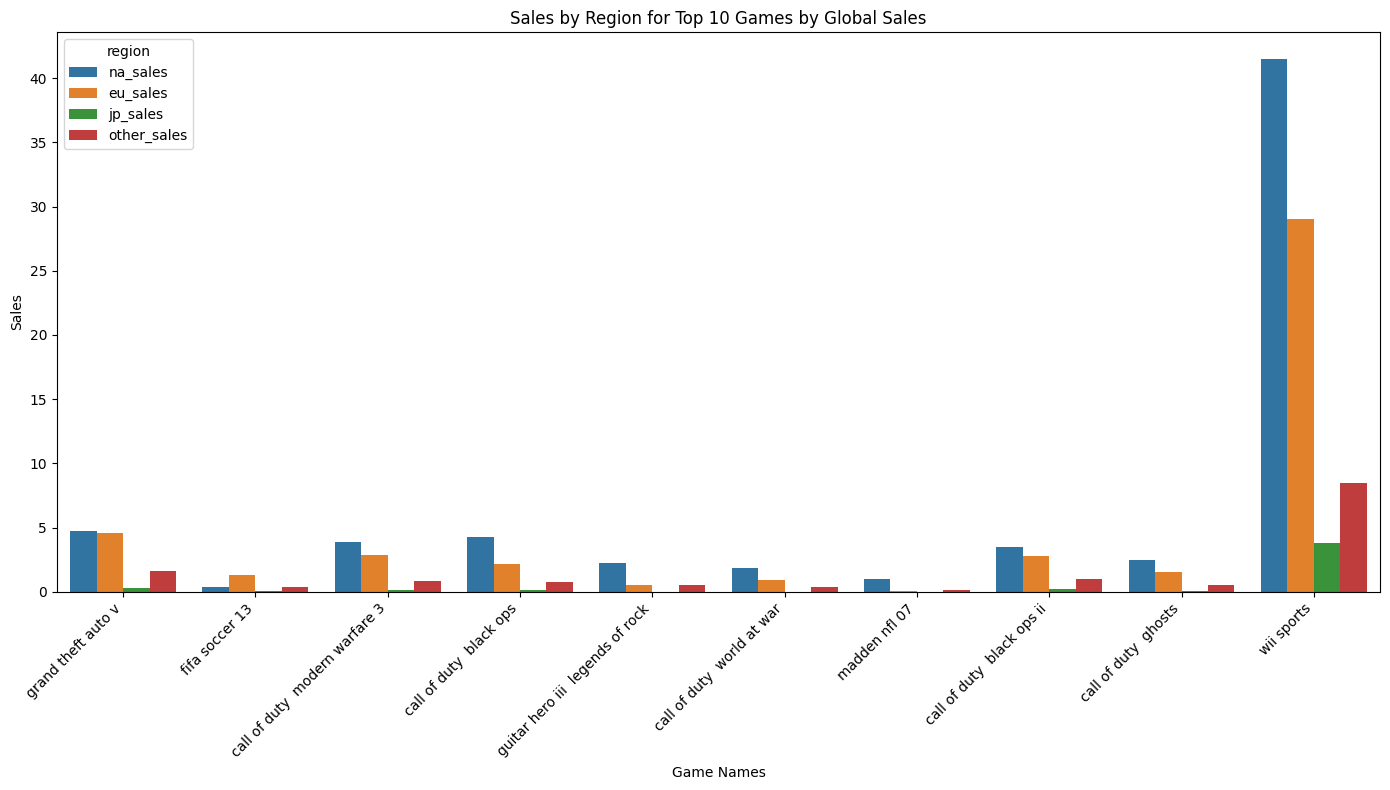

In [40]:
# Step 4: Plot the data
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='name', y='sales', hue='region', data=melted_df, errorbar=None)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set labels and title
plt.xlabel('Game Names')
plt.ylabel('Sales')
plt.title('Sales by Region for Top 10 Games by Global Sales')
plt.tight_layout()

plt.show()

In [125]:
#FOR MASTER

import pandas as pd

# Ensure there are no missing sales columns
merged_df = merged_df.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'])

# Group by name and sum global sales to identify the top 10 games
sum_merged_df = merged_df.groupby('name')['global_sales'].sum()

# Sort the summed sales in descending order and get the top 10 games
top_10_world = sum_merged_df.sort_values(ascending=False).head(10)

# Filter the original DataFrame to include only the top 10 games
top_10_df = merged_df[merged_df['name'].isin(top_10_world.index)]

# Calculate total sales per region across the entire dataset
total_sales_per_region = merged_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calculate sales for "Grand Theft Auto V" in each region
gta_sales_per_region = top_10_df[top_10_df['name'] == 'grand theft auto v'][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calculate the percentage of "Grand Theft Auto V" sales in each region
gta_sales_percentage = (gta_sales_per_region / total_sales_per_region) * 100

# Create a DataFrame to hold the summary results with multi-index for nice headers with newlines
results_df = pd.DataFrame({
    "Total Sales by Region": total_sales_per_region,
    "GTA V Sales by Region": gta_sales_per_region,
    "GTA V Sales Percentage": gta_sales_percentage
})

# Format the percentage column with two decimal places
results_df["GTA V Sales Percentage"] = results_df["GTA V Sales Percentage"].map("{:.2f}%".format)
results_df["Total Sales by Region"] = results_df["Total Sales by Region"].map("{:.2f}".format)
results_df["GTA V Sales by Region"] = results_df["GTA V Sales by Region"].map("{:.2f}".format)

# Display the DataFrame
display(results_df)

# Create a Styler object
styled_results_df = results_df.style \
    .set_table_styles(
        [
            {'selector': 'td', 'props': [('font-size', '13pt')]},          # Data cells
            {'selector': 'th', 'props': [('font-size', '15pt')]},          # Header cells
            {'selector': '.row_heading', 'props': [('font-size', '13pt')]}, # Index cells
            {'selector': 'caption', 'props': [('caption-side', 'bottom')]}  # Caption positioning
        ]
    ).set_properties(**{
        'font-size': '13pt'  # Change the '13pt' to whatever font size you need for cell values
    })

# Display the styled DataFrame
display(styled_results_df)


,Total Sales by Region,GTA V Sales by Region,GTA V Sales Percentage
na_sales,7124.27,117.30,1.65%
eu_sales,4267.07,115.20,2.70%
jp_sales,755.89,6.95,0.92%
other_sales,1547.88,40.15,2.59%


,Total Sales by Region,GTA V Sales by Region,GTA V Sales Percentage
na_sales,7124.27,117.30,1.65%
eu_sales,4267.07,115.20,2.70%
jp_sales,755.89,6.95,0.92%
other_sales,1547.88,40.15,2.59%


                  name       region   sales
24  grand theft auto v     eu_sales  115.20
25  grand theft auto v     jp_sales    6.95
26  grand theft auto v     na_sales  117.30
27  grand theft auto v  other_sales   40.15


/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/3280050558.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='name', y='sales', hue='region', data=aggregated_df, ci=None)
/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/3280050558.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


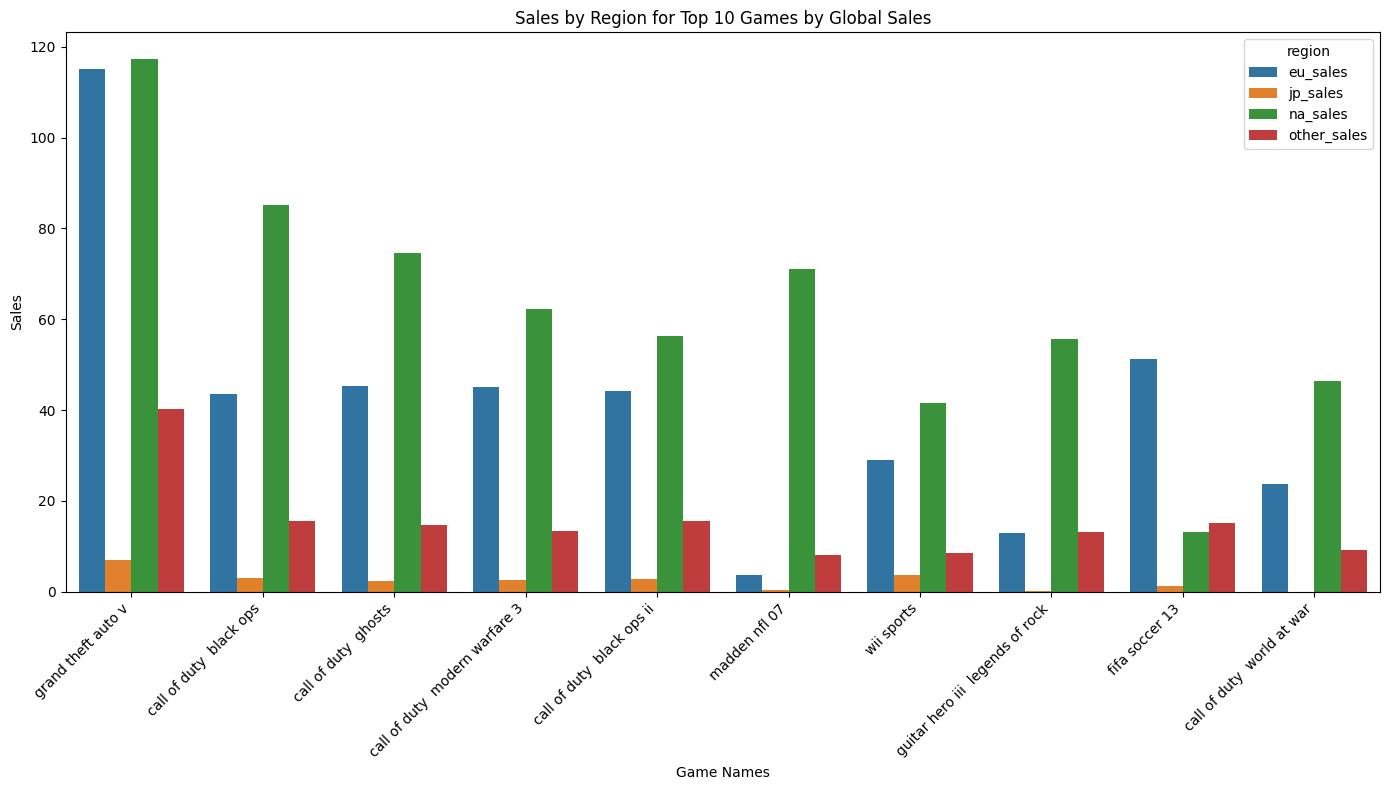

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure there are no missing sales columns
merged_df = merged_df.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'])

# Group by name and sum global sales to identify the top 10 games
sum_merged_df = merged_df.groupby('name')['global_sales'].sum()

# Sort the summed sales in descending order and get the top 10 games
top_10_world = sum_merged_df.sort_values(ascending=False).head(10)

# Filter the original DataFrame to include only the top 10 games
top_10_df = merged_df[merged_df['name'].isin(top_10_world.index)]

# Melt the DataFrame to long format for easier plotting
melted_df = pd.melt(top_10_df, id_vars=['name'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                    var_name='region', value_name='sales')

# Aggregate the sales for each game and region
aggregated_df = melted_df.groupby(['name', 'region'], as_index=False)['sales'].sum()

# Pre-Plot Check: Ensure the aggregated DataFrame is correct
print(aggregated_df[aggregated_df['name'] == 'grand theft auto v'])

# Desired order of the x-axis labels
desired_order = [
    "grand theft auto v",
    "call of duty  black ops",
    "call of duty  ghosts",
    "call of duty  modern warfare 3",
    "call of duty  black ops ii",
    "madden nfl 07",
    "wii sports",
    "guitar hero iii  legends of rock",
    "fifa soccer 13",
    "call of duty  world at war"
]

# Set x-axis category order
aggregated_df['name'] = pd.Categorical(aggregated_df['name'], categories=desired_order, ordered=True)

# Plot the data
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='name', y='sales', hue='region', data=aggregated_df, ci=None)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set labels and title
plt.xlabel('Game Names')
plt.ylabel('Sales')
plt.title('Sales by Region for Top 10 Games by Global Sales')
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

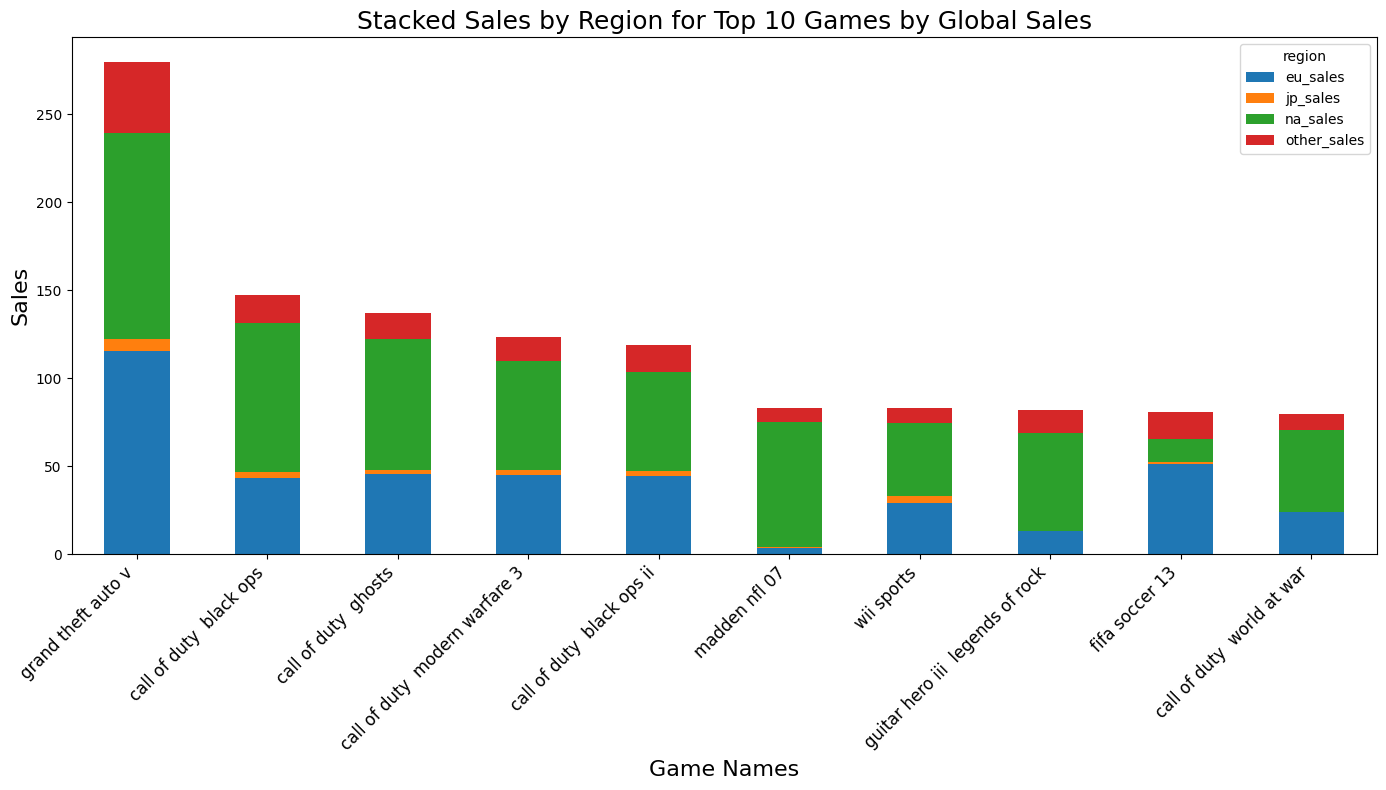

In [86]:
#STACKED PLOT WITH REGIONS NOT IN ORDER !!!!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure there are no missing sales columns
merged_df = merged_df.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'])

# Group by name and sum global sales to identify the top 10 games
sum_merged_df = merged_df.groupby('name')['global_sales'].sum()

# Sort the summed sales in descending order and get the top 10 games
top_10_world = sum_merged_df.sort_values(ascending=False).head(10)

# Filter the original DataFrame to include only the top 10 games
top_10_df = merged_df[merged_df['name'].isin(top_10_world.index)]

# Melt the DataFrame to long format for easier plotting
melted_df = pd.melt(top_10_df, id_vars=['name'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                    var_name='region', value_name='sales')

# Aggregate the sales for each game and region
aggregated_df = melted_df.groupby(['name', 'region'], as_index=False)['sales'].sum()

# Pivot the DataFrame to wide format for stacked bar plot
pivot_df = aggregated_df.pivot(index='name', columns='region', values='sales').fillna(0)

# Desired order of the x-axis labels
desired_order = [
    "grand theft auto v",
    "call of duty  black ops",
    "call of duty  ghosts",
    "call of duty  modern warfare 3",
    "call of duty  black ops ii",
    "madden nfl 07",
    "wii sports",
    "guitar hero iii  legends of rock",
    "fifa soccer 13",
    "call of duty  world at war"
]

# Reorder the index to match the desired order
pivot_df = pivot_df.reindex(desired_order)

# Plot the data
plt.figure(figsize=(14, 8))
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

# Set the fontsize for the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Set labels and title
plt.xlabel('Game Names', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.title('Stacked Sales by Region for Top 10 Games by Global Sales', fontsize=18)

# Ensure layout is adjusted for better readability
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

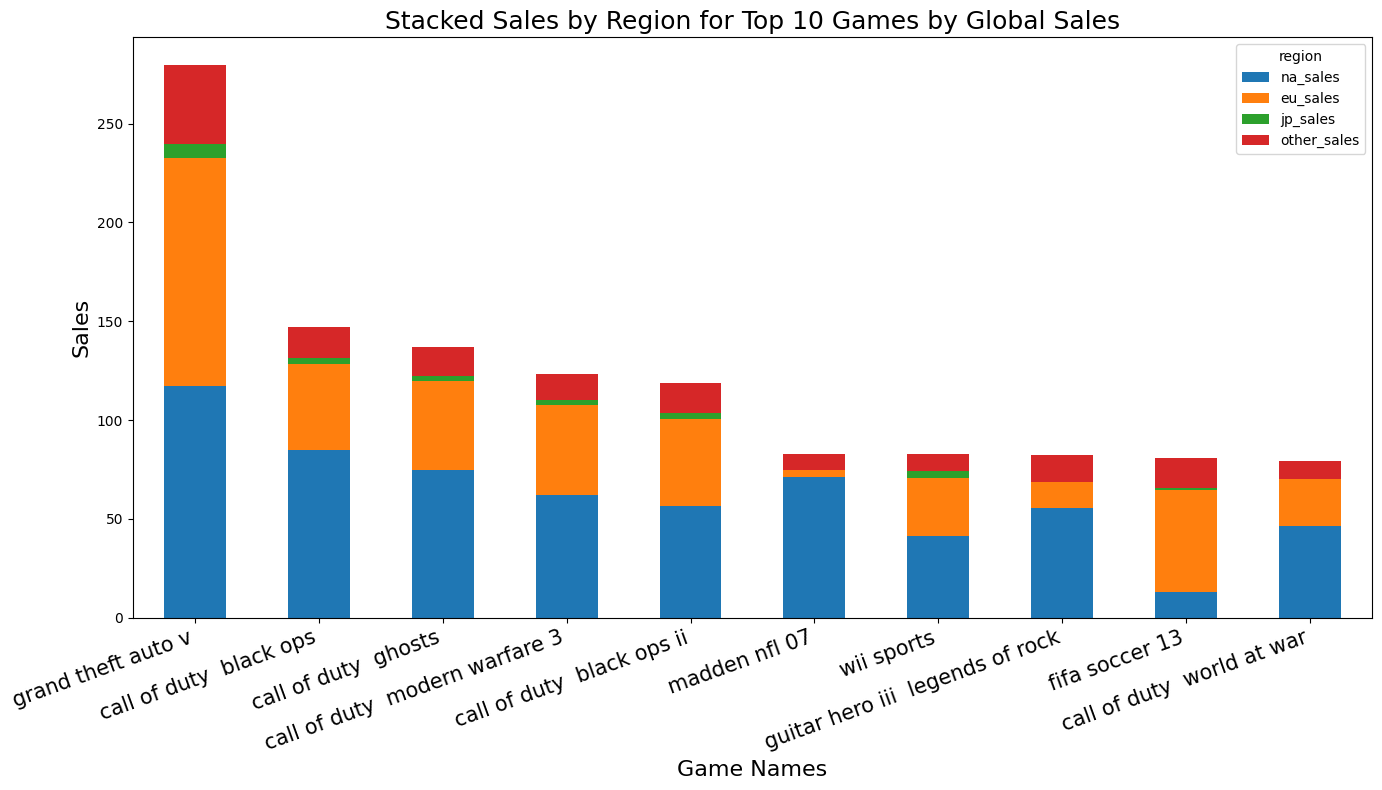

In [92]:
#FOR MASTER
#STACKED PLOT WITH REGIONS IN ORDER 

# Ensure there are no missing sales columns
merged_df = merged_df.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'])

# Group by name and sum global sales to identify the top 10 games
sum_merged_df = merged_df.groupby('name')['global_sales'].sum()

# Sort the summed sales in descending order and get the top 10 games
top_10_world = sum_merged_df.sort_values(ascending=False).head(10)

# Filter the original DataFrame to include only the top 10 games
top_10_df = merged_df[merged_df['name'].isin(top_10_world.index)]

# Melt the DataFrame to long format for easier plotting
melted_df = pd.melt(top_10_df, id_vars=['name'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                    var_name='region', value_name='sales')

# Aggregate the sales for each game and region
aggregated_df = melted_df.groupby(['name', 'region'], as_index=False)['sales'].sum()

# Pivot the DataFrame to wide format for stacked bar plot
pivot_df = aggregated_df.pivot(index='name', columns='region', values='sales').fillna(0)

# Desired order of the x-axis labels
desired_order = [
    "grand theft auto v",
    "call of duty  black ops",
    "call of duty  ghosts",
    "call of duty  modern warfare 3",
    "call of duty  black ops ii",
    "madden nfl 07",
    "wii sports",
    "guitar hero iii  legends of rock",
    "fifa soccer 13",
    "call of duty  world at war"
]

# Reorder the index to match the desired order of game names
pivot_df = pivot_df.reindex(desired_order)

# Desired order of the regions
desired_region_order = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Reorder the columns to match the desired order of regions
pivot_df = pivot_df[desired_region_order]

# Plot the data
plt.figure(figsize=(14, 8))
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

# Set the fontsize for the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right', fontsize=15)

# Set labels and title
plt.xlabel('Game Names', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.title('Stacked Sales by Region for Top 10 Games by Global Sales', fontsize=18)

# Ensure layout is adjusted for better readability
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/1121486188.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='name', y='sales', hue='region', data=melted_df, ci=None)
/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/1121486188.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


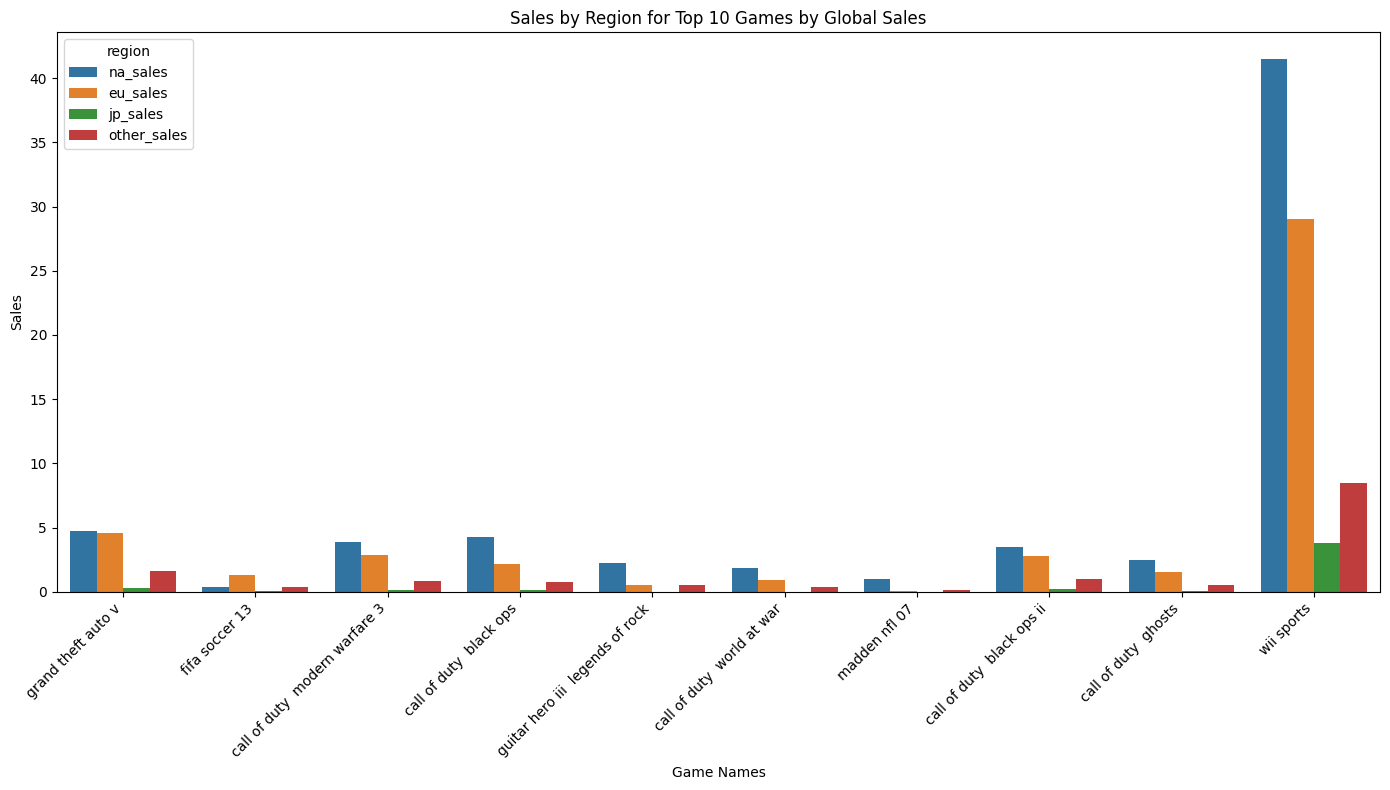

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure there are no missing sales columns
merged_df = merged_df.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'])

# Step 1: Group by name and sum global sales to identify the top 10 games
sum_merged_df = merged_df.groupby('name')['global_sales'].agg(total_world_sales='sum')
sorted_sum_merged_df = sum_merged_df.sort_values(by='total_world_sales', ascending=False)
top_10_world = sorted_sum_merged_df.head(10)

# Step 2: Filter the original DataFrame to include only the top 10 games
top_10_df = merged_df[merged_df['name'].isin(top_10_world.index)]

# Step 3: Melt the DataFrame to long format
melted_df = pd.melt(top_10_df, id_vars=['name'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                    var_name='region', value_name='sales')

# Step 4: Plot the data
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='name', y='sales', hue='region', data=melted_df, ci=None)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set labels and title
plt.xlabel('Game Names')
plt.ylabel('Sales')
plt.title('Sales by Region for Top 10 Games by Global Sales')
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/1349431341.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='name', y='sales', hue='region', data=aggregated_df, ci=None)
/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/1349431341.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Total Sales Per Region:
na_sales       7124.27
eu_sales       4267.07
jp_sales        755.89
other_sales    1547.88
dtype: float64

Grand Theft Auto V Sales Per Region:
na_sales       117.30
eu_sales       115.20
jp_sales         6.95
other_sales     40.15
dtype: float64

Percentage of Grand Theft Auto V Sales Per Region:
na_sales       1.646484
eu_sales       2.699745
jp_sales       0.919446
other_sales    2.593870
dtype: float64
                  name       region   sales
24  grand theft auto v     eu_sales  115.20
25  grand theft auto v     jp_sales    6.95
26  grand theft auto v     na_sales  117.30
27  grand theft auto v  other_sales   40.15


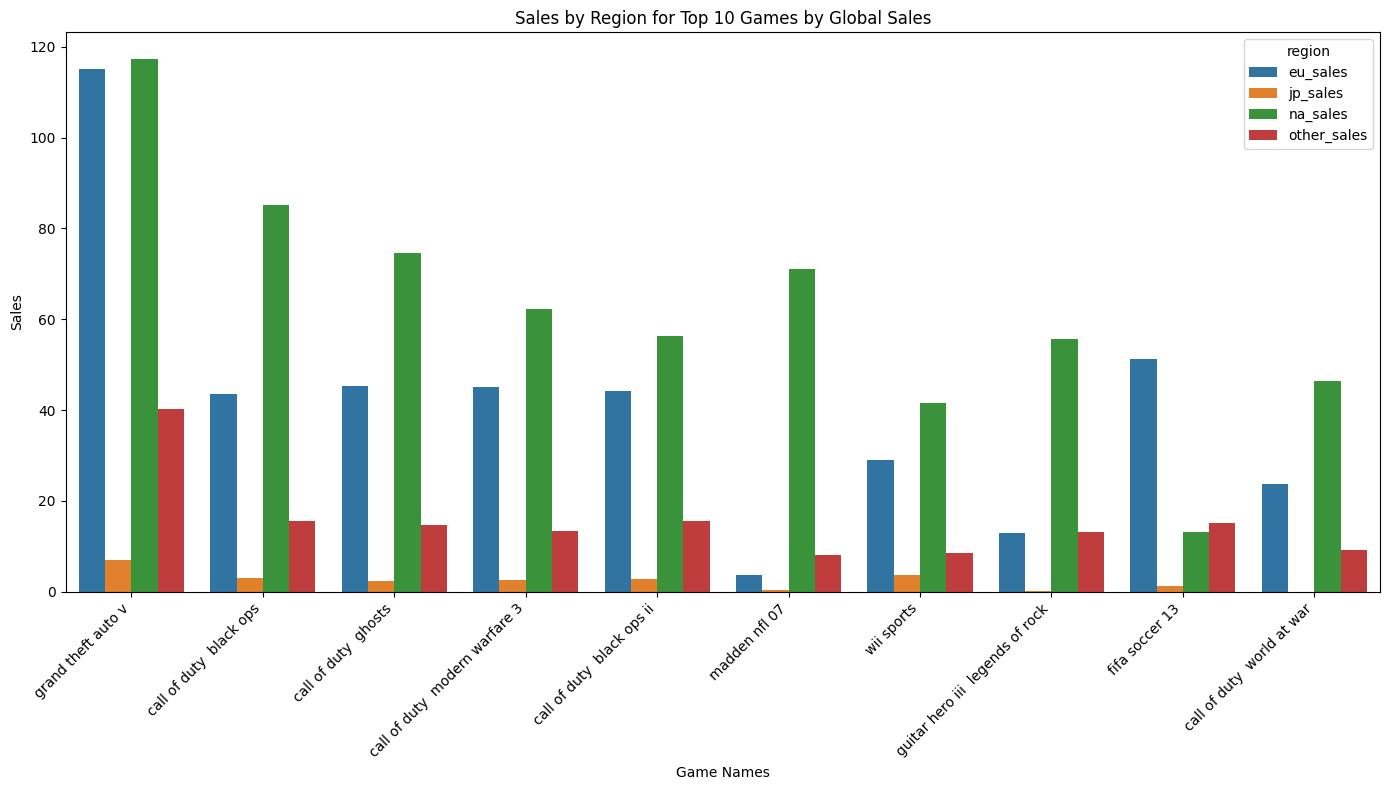

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure there are no missing sales columns
merged_df = merged_df.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'])

# Group by name and sum global sales to identify the top 10 games
sum_merged_df = merged_df.groupby('name')['global_sales'].sum()

# Sort the summed sales in descending order and get the top 10 games
top_10_world = sum_merged_df.sort_values(ascending=False).head(10)

# Filter the original DataFrame to include only the top 10 games
top_10_df = merged_df[merged_df['name'].isin(top_10_world.index)]

# Calculate total sales per region across the entire dataset
total_sales_per_region = merged_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calculate sales for "Grand Theft Auto V" in each region
gta_sales_per_region = top_10_df[top_10_df['name'] == 'grand theft auto v'][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calculate the percentage of "Grand Theft Auto V" sales in each region
gta_sales_percentage = (gta_sales_per_region / total_sales_per_region) * 100

# Display the results
print("Total Sales Per Region:")
print(total_sales_per_region)
print("\nGrand Theft Auto V Sales Per Region:")
print(gta_sales_per_region)
print("\nPercentage of Grand Theft Auto V Sales Per Region:")
print(gta_sales_percentage)

# Proceed with the plotting code if needed
# Melt the DataFrame to long format for easier plotting
melted_df = pd.melt(top_10_df, id_vars=['name'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                    var_name='region', value_name='sales')

# Aggregate the sales for each game and region
aggregated_df = melted_df.groupby(['name', 'region'], as_index=False)['sales'].sum()

# Pre-Plot Check: Ensure the aggregated DataFrame is correct
print(aggregated_df[aggregated_df['name'] == 'grand theft auto v'])

# Desired order of the x-axis labels
desired_order = [
    "grand theft auto v",
    "call of duty  black ops",
    "call of duty  ghosts",
    "call of duty  modern warfare 3",
    "call of duty  black ops ii",
    "madden nfl 07",
    "wii sports",
    "guitar hero iii  legends of rock",
    "fifa soccer 13",
    "call of duty  world at war"
]

# Set x-axis category order
aggregated_df['name'] = pd.Categorical(aggregated_df['name'], categories=desired_order, ordered=True)

# Plot the data
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='name', y='sales', hue='region', data=aggregated_df, ci=None)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set labels and title
plt.xlabel('Game Names')
plt.ylabel('Sales')
plt.title('Sales by Region for Top 10 Games by Global Sales')
plt.tight_layout()

# Show the plot
plt.show()

Total NA Sales: 7124.27
Total EU Sales: 4267.07
Total JP Sales: 755.8900000000001
Total Other Sales: 1547.88
Total Global Sales: 13698.710000000003


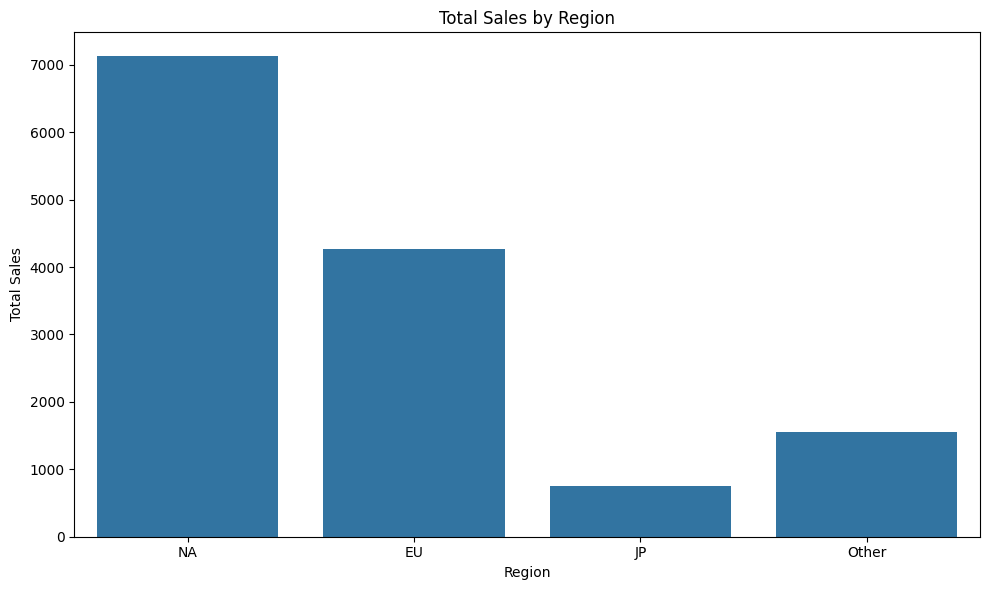

In [46]:
#FOR MASTER
# Sum the sales for each region
total_na_sales = merged_df['na_sales'].sum()
total_eu_sales = merged_df['eu_sales'].sum()
total_jp_sales = merged_df['jp_sales'].sum()
total_other_sales = merged_df['other_sales'].sum()
total_global_sales = merged_df['global_sales'].sum()

# Display the results
print(f"Total NA Sales: {total_na_sales}")
print(f"Total EU Sales: {total_eu_sales}")
print(f"Total JP Sales: {total_jp_sales}")
print(f"Total Other Sales: {total_other_sales}")
print(f"Total Global Sales: {total_global_sales}")

# Create a DataFrame to hold the totals
totals_df = pd.DataFrame({
    'Region': ['NA', 'EU', 'JP', 'Other'],
    'Sales': [total_na_sales, total_eu_sales, total_jp_sales, total_other_sales]
})

# Plot the total sales by region
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Region', y='Sales', data=totals_df)

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.tight_layout()

# Show the plot
plt.show()

Total NA Sales: 7124.27
Total EU Sales: 4267.07
Total JP Sales: 755.8900000000001
Total Other Sales: 1547.88
Total Global Sales: 13698.710000000003


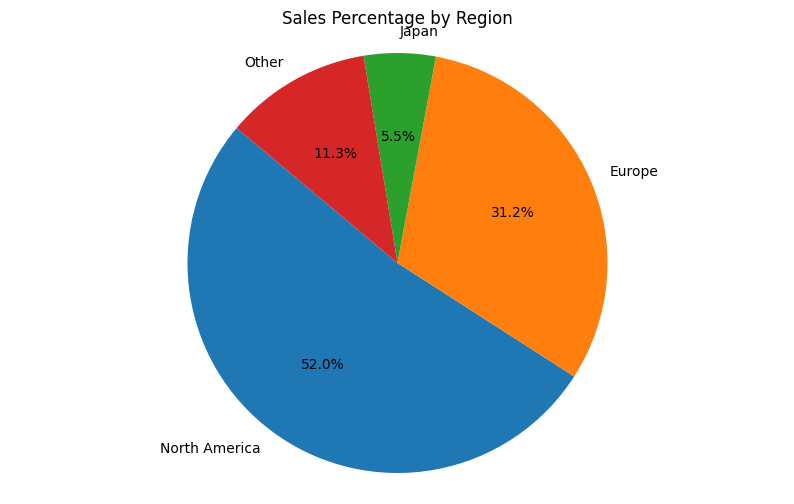

In [124]:
#FOR MASTER
import pandas as pd
import matplotlib.pyplot as plt

# Sum the sales for each region
total_na_sales = merged_df['na_sales'].sum()
total_eu_sales = merged_df['eu_sales'].sum()
total_jp_sales = merged_df['jp_sales'].sum()
total_other_sales = merged_df['other_sales'].sum()
total_global_sales = merged_df['global_sales'].sum()

# Display the results (optional, for verification)
print(f"Total NA Sales: {total_na_sales}")
print(f"Total EU Sales: {total_eu_sales}")
print(f"Total JP Sales: {total_jp_sales}")
print(f"Total Other Sales: {total_other_sales}")
print(f"Total Global Sales: {total_global_sales}")

# Calculate the percentage of sales for each region
na_percentage = (total_na_sales / total_global_sales) * 100
eu_percentage = (total_eu_sales / total_global_sales) * 100
jp_percentage = (total_jp_sales / total_global_sales) * 100
other_percentage = (total_other_sales / total_global_sales) * 100

# Create a list of percentages and labels
sales_percentages = [na_percentage, eu_percentage, jp_percentage, other_percentage]
region_labels = ['North America', 'Europe', 'Japan', 'Other']

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sales_percentages, labels=region_labels, autopct='%1.1f%%', startangle=140)
plt.title('Sales Percentage by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [68]:
#FOR MASTER
#TOTAL WORLD SALES ANALYSIS
sum_merged_df = merged_df.groupby('name')['global_sales'].agg(total_world_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='total_world_sales', ascending=False)
top_10_world = sorted_sum_merged_df.head(10)
top_10_world

,total_world_sales
name,
grand theft auto v,279.60
call of duty black ops,147.00
call of duty ghosts,136.90
call of duty modern warfare 3,123.32
call of duty black ops ii,118.88
madden nfl 07,82.80
wii sports,82.74
guitar hero iii legends of rock,82.00
fifa soccer 13,80.80


In [ ]:
#FOR MASTER
#TOTAL WORLD SALES ANALYSIS
import matplotlib.pyplot as plt
ax = top_10_world.plot(kind='bar', y='total_world_sales')

# Showing the plot
plt.ylabel('Total World Sales')
plt.title('Top 10 Total World Sales')

ax.set_xticklabels(ax.get_xticklabels(), rotation=20
                   ,ha='right')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()

# Showing the plot
plt.show()
plt.show()

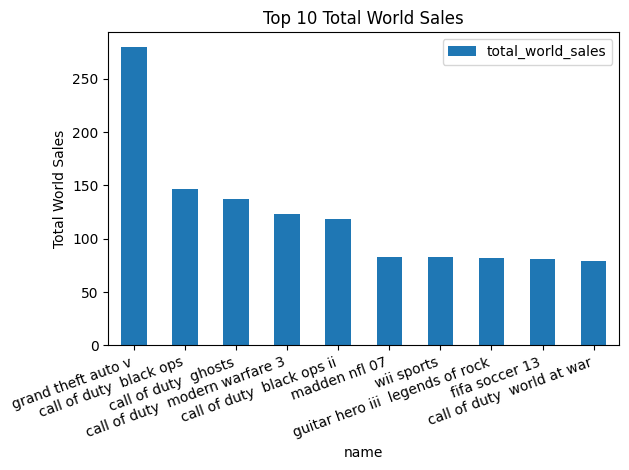

In [50]:
#EUROPE SALES ANALYSIS
sum_merged_df = merged_df.groupby('name')['eu_sales'].agg(europe_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='europe_sales', ascending=False)
top_10_europe = sorted_sum_merged_df.head(10)

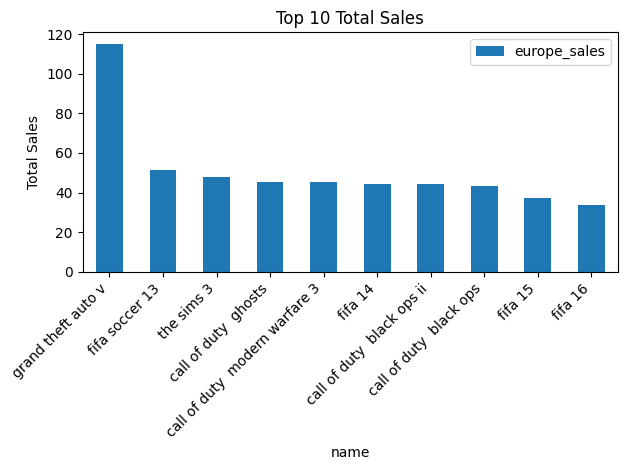

In [51]:
ax = top_10_europe.plot(kind='bar', y='europe_sales')

# Showing the plot
plt.ylabel('Total Sales')
plt.title('Top 10 Total Sales')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()

# Showing the plot
plt.show()
plt.show()

In [52]:
#NORTH AMERICA ANALYSIS
sum_merged_df = merged_df.groupby('name')['na_sales'].agg(north_america_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='north_america_sales', ascending=False)
top_10_NA = sorted_sum_merged_df.head(10)

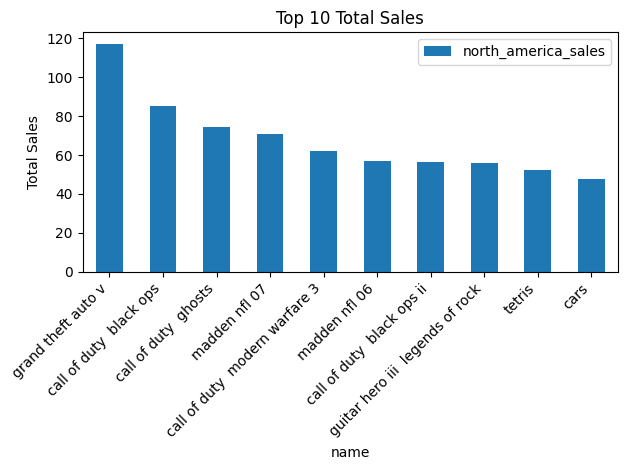

In [53]:
ax = top_10_NA.plot(kind='bar', y='north_america_sales')

# Showing the plot
plt.ylabel('Total Sales')
plt.title('Top 10 Total Sales')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()

# Showing the plot
plt.show()
plt.show()

In [54]:
#FOR MASTER
#JAPAN SALES ANALYSIS
sum_merged_df = merged_df.groupby('name')['jp_sales'].agg(japan_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='japan_sales', ascending=False)
top_10_JP = sorted_sum_merged_df.head(10)
#japan market is particular doesn't have GTA as top game vs other regions
top_10_JP

,japan_sales
name,
resident evil 2,14.63
tetris,12.06
final fantasy ix,11.12
dragon quest viii journey of the cursed king,8.94
pro evolution soccer 2008,7.80
resident evil 5,7.20
grand theft auto v,6.95
final fantasy vii,6.56
new super mario bros,6.50


In [55]:
#FOR MASTER
#JAPAN SALES ANALYSIS
# Ensure there are no missing sales columns
merged_df = merged_df.dropna(subset=['jp_sales'])

# Step 1: Group by name and sum Japan sales to get total sales per game in Japan
sum_merged_df = merged_df.groupby('name')['jp_sales'].agg(japan_sales='sum')

# Step 2: Sort the summed sales in descending order and get the top 10 games
sorted_sum_merged_df = sum_merged_df.sort_values(by='japan_sales', ascending=False)

# Step 3: Filter the top 10 games
top_10_JP = sorted_sum_merged_df.head(10).copy()  # Use .copy() to ensure it's a new DataFrame

# Step 4: Add a ranking column using loc to modify the DataFrame safely
top_10_JP.loc[:, 'rank'] = top_10_JP['japan_sales'].rank(ascending=False, method='first').astype(int)

# Step 5: Reorder columns to have the rank column first
top_10_JP = top_10_JP[['rank', 'japan_sales']]

# Display the top 10 games with their rankings
display(top_10_JP)

,rank,japan_sales
name,,
resident evil 2,1,14.63
tetris,2,12.06
final fantasy ix,3,11.12
dragon quest viii journey of the cursed king,4,8.94
pro evolution soccer 2008,5,7.80
resident evil 5,6,7.20
grand theft auto v,7,6.95
final fantasy vii,8,6.56
new super mario bros,9,6.50


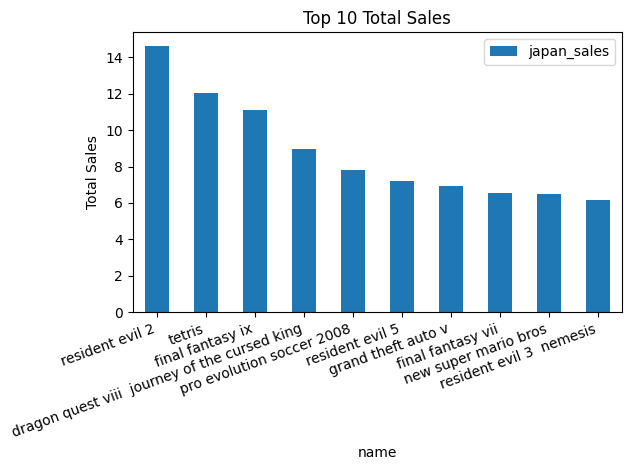

In [93]:
ax = top_10_JP.plot(kind='bar', y='japan_sales')

# Showing the plot
plt.ylabel('Total Sales')
plt.title('Top 10 Total Sales')

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()

# Showing the plot
plt.show()
plt.show()

/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/2224285229.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='name', y='sales', hue='region', data=melted_df, ci=None)
/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_88238/2224285229.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


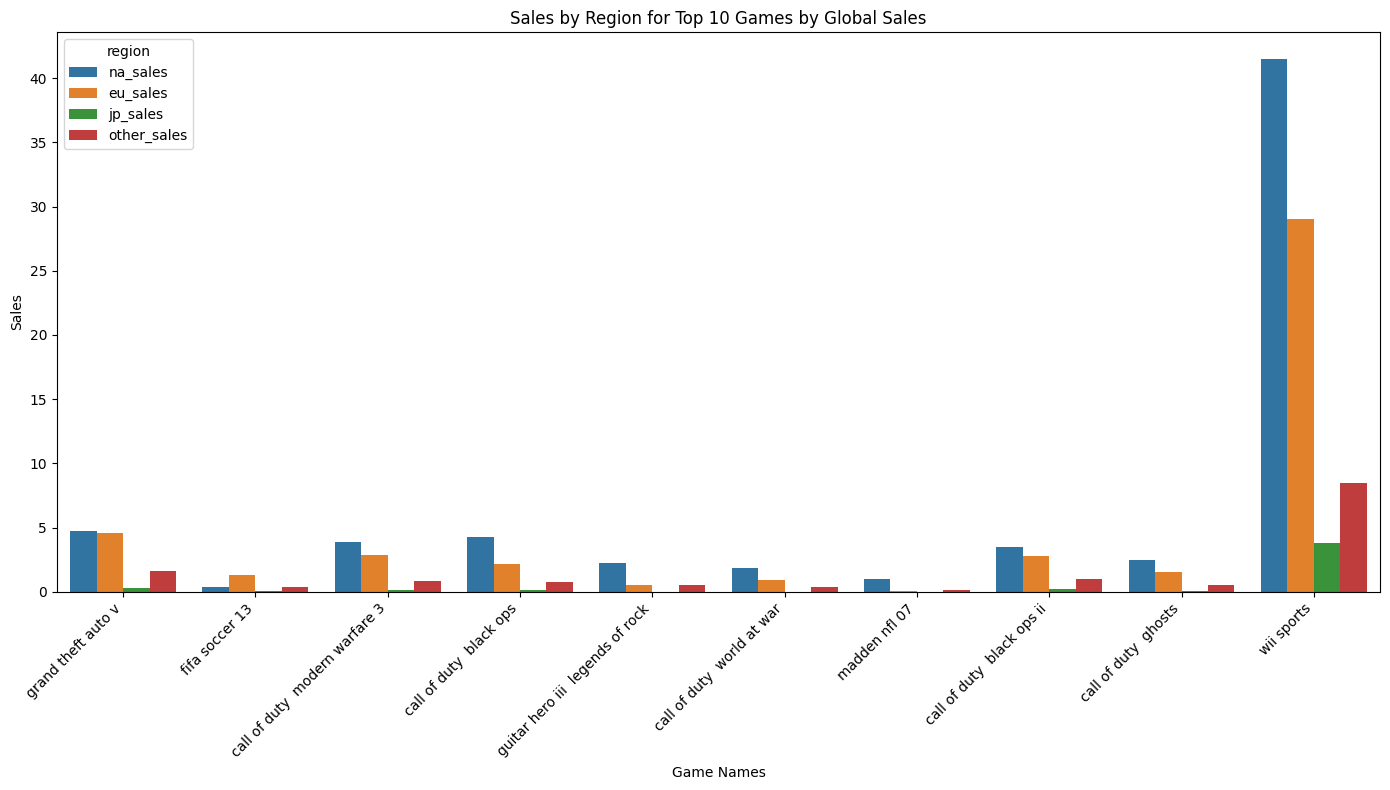

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


merged_df = merged_df.dropna(subset=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

# Get the top 10 games by global sales
top_10_games = merged_df.groupby('name')['global_sales'].sum().nlargest(10).index
top_10_df = merged_df[merged_df['name'].isin(top_10_games)]

# Melt the DataFrame
melted_df = pd.melt(top_10_df, id_vars=['name'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                    var_name='region', value_name='sales')

# Plotting the data
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='name', y='sales', hue='region', data=melted_df, ci=None)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set labels and title
plt.xlabel('Game Names')
plt.ylabel('Sales')
plt.title('Sales by Region for Top 10 Games by Global Sales')
plt.tight_layout()

In [58]:
df_multiindex = merged_df.set_index(['name', 'platform_y'])
df_multiindex

platform_x  \
name                                 platform_y                     
the legend of zelda  ocarina of time nintendo 64      nintendo 64   
                                     nintendo 3ds     nintendo 64   
tony hawk's pro skater 2             playstation      playstation   
                                     gameboy advance  playstation   
                                     nintendo 64      playstation   
...                                                           ...   
charlie's angels                     game cube           gamecube   
fast & furious  showdown             xbox 360            xbox 360   
                                     playstation 3       xbox 360   
leisure suit larry  box office bust  xbox 360                  pc   
                                     playstation 3             pc   

                                                            release_date  \
name                                 platform_y                            
the legend of zelda  ocarina of time nintendo 64       November 23, 1998   
                                     nintendo 3ds      November 23, 1998   
tony hawk's pro skater 2             playstation      September 20, 2000   
                                     gameboy advance  September 20, 2000   
                                     nintendo 64      September 20, 2000   
...                                                                  ...   
charlie's angels                     game cube              July 9, 2003   
fast & furious  showdown             xbox 360               May 21, 2013   
                                     playstation 3          May 21, 2013   
leisure suit larry  box office bust  xbox 360             March 31, 2009   
                                     playstation 3        March 31, 2009   

                                                      meta_score  user_review  \
name                                 platform_y                                 
the legend of zelda  ocarina of time nintendo 64              99          9.1   
                                     nintendo 3ds             99          7.4   
tony hawk's pro skater 2             playstation              98          7.7   
                                     gameboy advance          98          8.4   
                                     nintendo 64              98          7.9   
...                                                          ...          ...   
charlie's angels                     game cube                23          1.9   
fast & furious  showdown             xbox 360                 22          2.7   
                                     playstation 3            22          6.3   
leisure suit larry  box office bust  xbox 360                 20          2.0   
                                     playstation 3            20          7.3   

                                                      year      genre  \
name                                 platform_y                         
the legend of zelda  ocarina of time nintendo 64      1998     Action   
                                     nintendo 3ds     2011     Action   
tony hawk's pro skater 2             playstation      2000     Sports   
                                     gameboy advance  2001     Sports   
                                     nintendo 64      2001     Sports   
...                                                    ...        ...   
charlie's angels                     game cube        2003     Action   
fast & furious  showdown             xbox 360         2013     Action   
                                     playstation 3    2013     Action   
leisure suit larry  box office bust  xbox 360         2009  Adventure   
                                     playstation 3    2009  Adventure   

                                                        publisher  na_sales  \
name                                 platform_y                               
the le

In [59]:
column_dtype = merged_df['user_review'].dtype
print(column_dtype)

float64


In [60]:
#REVIEW ANALYSIS
review_merged_df = merged_df.groupby('name')['user_review'].agg(mean_review ='mean')
sorted_merged_df = review_merged_df.sort_values(by = 'mean_review', ascending=False)

In [61]:
sorted_merged_df.pivot_table(index='name', columns='user_review', values=['global_sales'], aggfunc='sum')

KeyError: 'global_sales'

In [ ]:
top_10_review_df = sorted_review_merged_df.head(10)
top_10_review_df
#best reviewed games are not best selling games

In [ ]:
import plotly.express as px
fig = px.bar(top_10_review_df, x='name', y='user_review', title='Top 10 User Reviews of Games')
fig.show()

In [122]:
#TOTAL WORLD SALES ANALYSIS BY GENRE
sum_merged_df = merged_df.groupby('genre')['global_sales'].agg(genre_total_world_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='genre_total_world_sales', ascending=False)
sorted_sum_merged_df.head(20)

,genre_total_world_sales
genre,
Action,3918.11
Sports,2532.27
Shooter,2211.30
Racing,1050.43
Role-Playing,937.71
Misc,804.40
Platform,781.67
Fighting,526.80
Simulation,411.34


In [ ]:
merged_df['genre'].unique()

In [ ]:
#EUROPE SALES ANALYSIS BY GENRE
sum_merged_df = merged_df.groupby('genre')['eu_sales'].agg(genre_eu_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='genre_eu_sales', ascending=False)
sorted_sum_merged_df.head(20)

In [ ]:
#NORTH AMERICA SALES ANALYSIS BY GENRE
sum_merged_df = merged_df.groupby('genre')['na_sales'].agg(genre_na_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='genre_na_sales', ascending=False)
sorted_sum_merged_df.head(20)

In [ ]:
#JAPAN SALES ANALYSIS BY GENRE
sum_merged_df = merged_df.groupby('genre')['jp_sales'].agg(genre_jp_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='genre_jp_sales', ascending=False)
sorted_sum_merged_df.head(20)

In [114]:
merged_df['publisher'].nunique()

285

In [119]:
#FOR MASTER
#TOTAL WORLD SALES ANALYSIS BY PUBLISHER
sum_merged_df = merged_df.groupby(['publisher'])['global_sales'].agg(publisher_total_world_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='publisher_total_world_sales', ascending=False)
top_10_publi = sorted_sum_merged_df.head(10)

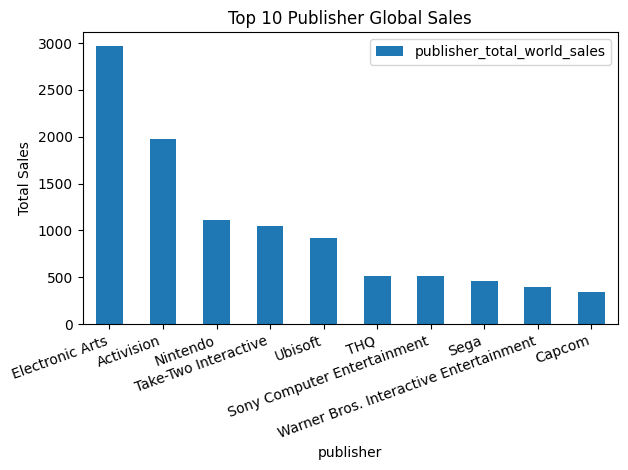

In [121]:
#FOR MASTER
ax = top_10_publi.plot(kind='bar', y='publisher_total_world_sales')

# Showing the plot
plt.ylabel('Total Sales')
plt.title('Top 10 Publisher Global Sales')

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()

# Showing the plot
plt.show()

In [ ]:
top_10_JP = sorted_sum_merged_df.head(10).copy()  # Use .copy() to ensure it's a new DataFrame

# Step 4: Add a ranking column using loc to modify the DataFrame safely
top_10_JP.loc[:, 'rank'] = top_10_JP['japan_sales'].rank(ascending=False, method='first').astype(int)

# Step 5: Reorder columns to have the rank column first
top_10_JP = top_10_JP[['rank', 'japan_sales']]

# Display the top 10 games with their rankings
display(top_10_JP)

In [ ]:
#TOTAL WORLD SALES ANALYSIS BY PUBLISHER
sum_merged_df = merged_df.groupby(['publisher','year'])['global_sales'].agg(publisher_total_world_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='publisher_total_world_sales', ascending=False)
sorted_sum_merged_df.head(10)

In [ ]:
#TOTAL WORLD SALES ANALYSIS BY PUBLISHER
sum_merged_df = merged_df.groupby(['publisher'])['global_sales'].agg(publisher_total_world_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='publisher_total_world_sales', ascending=False)
sorted_sum_merged_df.head(10)

In [ ]:
#EUROPE SALES ANALYSIS BY PUBLISHER
sum_merged_df = merged_df.groupby('publisher')['eu_sales'].agg(publisher_eu_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='publisher_eu_sales', ascending=False)
sorted_sum_merged_df.head(20)

In [ ]:
#NORTH AMERICA SALES ANALYSIS BY PUBLISHER
sum_merged_df = merged_df.groupby('publisher')['na_sales'].agg(publisher_na_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='publisher_na_sales', ascending=False)
sorted_sum_merged_df.head(20)

In [ ]:
#JAPAN SALES ANALYSIS BY GENRE PUBLISHER
sum_merged_df = merged_df.groupby('publisher')['jp_sales'].agg(publisher_jp_sales = 'sum')
sorted_sum_merged_df= sum_merged_df.sort_values(by='publisher_jp_sales', ascending=False)
sorted_sum_merged_df.head(10)
top_publi_jp = sorted_sum_merged_df.head(10).copy
top_publi_jp.loc[:,'rank'] = top_publi_jp['publisher_jp_sales'].rank(ascending=False, method='first').astype(int)
top_publi_jp = top_publi_jp[['rank','publisher_jp_sales']]
display(top_publi_jp)

In [ ]:
sum_merged_df = merged_df.groupby('publisher')['jp_sales'].agg(publisher_jp_sales='sum')

# Sort the summed sales in descending order and get the top 10 publishers
sorted_sum_merged_df = sum_merged_df.sort_values(by='publisher_jp_sales', ascending=False)

# Filter the top 10 publishers
top_publi_jp = sorted_sum_merged_df.head(10).copy()

# Add a ranking column using loc to modify the DataFrame safely
top_publi_jp.loc[:,'rank'] = top_publi_jp['publisher_jp_sales'].rank(ascending=False, method='first').astype(int)

# Reorder columns to have the rank column first
top_publi_jp = top_publi_jp[['rank', 'publisher_jp_sales']]

# Display the top 10 publishers with their rankings
display(top_publi_jp)


In [ ]:
top_10_genres = pivot_genre_ratings.nlargest(10, 'average_rating')

In [ ]:
import plotly.express as px
